#### In this notebook, I examined the data from Udacity and extracted vehicles objects

In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import glob

import pandas as pd


In [2]:
# each row contains one string in the csv file:
# 1478019954685370994.jpg 1492 472 1830 608 1 "car"
udacity_data = pd.read_csv('./data/udacity_data_2/labels.csv', header=None)

In [11]:
len(udacity_data)

93086

## Visualisation

In [16]:
car_frames_list = []
notcar_frames_list = []
car_boxes = []
notcar_boxes = []
for _, row in udacity_data[:10].iterrows():
    row_list = row[0].split(' ')

    if row_list[-1] == '''"car"''':
        frame = row_list[0]
        box = row_list[1:5]
        label = int(row_list[5])
        if label:
            car_frames_list.append(frame)
            car_boxes.append(((int(box[0]), int(box[1])), (int(box[2]), int(box[3]))))
        else:
            notcar_frames_list.append(frame)
            notcar_boxes.append(((int(box[0]), int(box[1])), (int(box[2]), int(box[3]))))

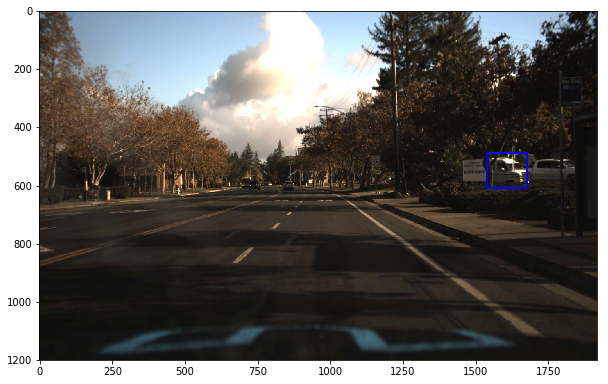

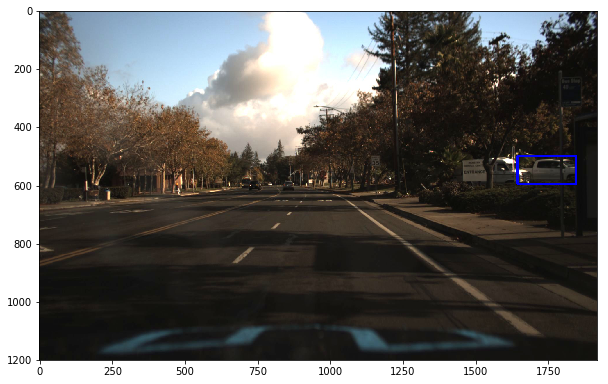

In [17]:
for i, f in enumerate(car_frames_list):
    plt.figure(figsize=(10,10))


    file_path = './data/udacity_data_2/' + f
    carimage = mpimg.imread(file_path)

    draw = cv2.rectangle(carimage, car_boxes[i][0], car_boxes[i][1], color=(0, 0, 255), thickness=6)
    plt.imshow(draw)
    plt.show()

### Extraction

In [18]:
test_file_path = './data/udacity_data_2/' + car_frames_list[0]


test_image = mpimg.imread(test_file_path)

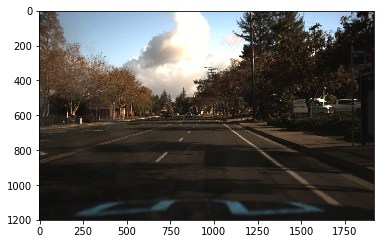

In [19]:
plt.imshow(test_image)

In [8]:
car_boxes[0]

((950, 574), (1004, 620))

## using numpy slicing for croping 

In [20]:
# roi = im[y1:y2, x1:x2]
test_box = car_boxes[0]
test_car = test_image[test_box[0][1]:test_box[1][1], test_box[0][0]:test_box[1][0]]

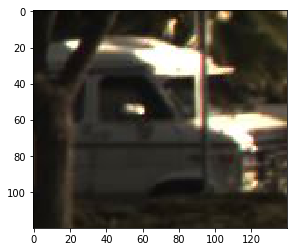

In [21]:
plt.imshow(test_car)

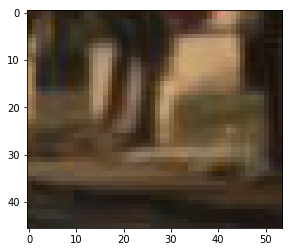

In [33]:
test_box = notcar_boxes[0]
test_notcar = test_image[test_box[0][1]:test_box[1][1], test_box[0][0]:test_box[1][0]]
plt.imshow(test_notcar)

In [45]:
car_frames_list = []
notcar_frames_list = []
car_boxes = []
notcar_boxes = []
for _, row in udacity_data[:5000].iterrows():
    row_list = row[0].split(' ')

    if row_list[-1] == '''"car"''':
        frame = row_list[0]
        box = row_list[1:5]
        label = int(row_list[5])
        if label:
            car_frames_list.append(frame)
            car_boxes.append(((int(box[0]), int(box[1])), (int(box[2]), int(box[3]))))
        else:
            notcar_frames_list.append(frame)
            notcar_boxes.append(((int(box[0]), int(box[1])), (int(box[2]), int(box[3]))))
assert len(car_frames_list) == len(car_boxes)
assert len(notcar_frames_list) == len(notcar_boxes)

In [46]:
print('Number of car frames:', len(car_frames_list))
print('Number of not-car frames:', len(notcar_frames_list))

Number of car frames: 1564
Number of not-car frames: 745


In [47]:
car_images = []
notcar_images = []
for i, f in enumerate(car_frames_list):
    # get the file path
    file_path = './data/udacity_data_2/' + f
    # read the frame and store it as numpy array
    carimage = mpimg.imread(file_path)
    # get the car box
    car_box = car_boxes[i]
    # crop = im[y1:y2, x1:x2]
    car_img_crop = carimage[car_box[0][1]:car_box[1][1], car_box[0][0]:car_box[1][0]]
    car_images.append(car_img_crop)

In [37]:
for i, f in enumerate(notcar_frames_list):
    # get the file path
    file_path = './data/udacity_data_2/' + f
    # read the frame and store it as numpy array
    notcarimage = mpimg.imread(file_path)
    # get thenot_car box
    box = notcar_boxes[i]
    # crop = im[y1:y2, x1:x2]
    notcar_img_crop =notcarimage[box[0][1]:box[1][1],box[0][0]:box[1][0]]
    notcar_images.append(notcar_img_crop)

### Visualisation

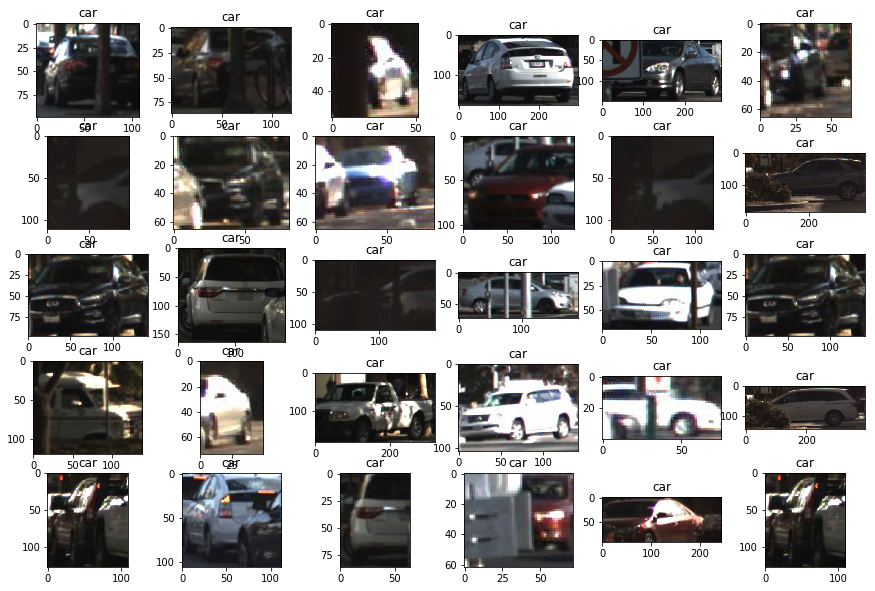

In [48]:
f, axes = plt.subplots(5, 6, figsize=(15,10))
for row in axes:
    for axe in row:
        index = np.random.randint(1500)
        axe.imshow(car_images[index])
        axe.set_title('car')

## store car images data

In [67]:
i = 0
for img in car_images:
    filename = './data/udacity_car_extracted/'+str(i)+'.png'
    mpimg.imsave(filename, cv2.resize(img, (64, 64)))
    i += 1